In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
claim=pd.read_csv('Auto_Insurance_Claims_amount.csv')
claim

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5.0,0.0,1.0,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42.0,0.0,8.0,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38.0,0.0,2.0,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65.0,0.0,7.0,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44.0,0.0,1.0,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4082,XT45580,US,IA,Iowa,408.946336,No,Basic,College,2/25/11,Employed,...,85.0,0.0,1.0,Corporate Auto,Corporate L3,Scratch/Dent,Branch,499.200000,SUV,Large
4083,RY23571,US,MO,Missouri,248.367134,No,Basic,Bachelor,1/1/11,Employed,...,39.0,5.0,1.0,Personal Auto,Personal L3,Hail,Branch,156.548370,Four-Door Car,Medsize
4084,NB82190,US,IA,Iowa,527.818376,No,Basic,College,2/9/11,Employed,...,60.0,0.0,3.0,Personal Auto,Personal L1,Hail,Branch,27.210992,Two-Door Car,Medsize
4085,XG14438,US,NE,Nebraska,1372.779972,Yes,Extended,College,1/8/11,Unemployed,...,4.0,0.0,2.0,Personal Auto,Personal L3,Collision,Agent,604.800000,SUV,Medsize


In [3]:
claim.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         1
Education                        1
Effective To Date                1
EmploymentStatus                 1
Gender                           1
Income                           1
Location Code                    1
Marital Status                   1
Monthly Premium Auto             1
Months Since Last Claim          1
Months Since Policy Inception    1
Number of Open Complaints        1
Number of Policies               1
Policy Type                      1
Policy                           1
Claim Reason                     1
Sales Channel                    1
Total Claim Amount               1
Vehicle Class                    1
Vehicle Size                     1
dtype: int64

In [4]:
claim.dropna(inplace=True)

drops all the rows with null values

In [5]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 4085
Data columns (total 26 columns):
Customer                         4086 non-null object
Country                          4086 non-null object
State Code                       4086 non-null object
State                            4086 non-null object
Claim Amount                     4086 non-null float64
Response                         4086 non-null object
Coverage                         4086 non-null object
Education                        4086 non-null object
Effective To Date                4086 non-null object
EmploymentStatus                 4086 non-null object
Gender                           4086 non-null object
Income                           4086 non-null float64
Location Code                    4086 non-null object
Marital Status                   4086 non-null object
Monthly Premium Auto             4086 non-null float64
Months Since Last Claim          4086 non-null float64
Months Since Policy Incep

info() function gives you information like number of rows and columns , datatype of each column and number of non-null rows

In [6]:
claim['Eft_day']=pd.to_datetime(claim['Effective To Date'],format='%m/%d/%y').dt.day
claim['Eft_month']=pd.to_datetime(claim['Effective To Date'],format='%m/%d/%y').dt.month
claim.drop(columns=['Effective To Date','Customer','Country'],axis=1,inplace=True)

In [7]:
claim

,State Code,State,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,...,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Eft_day,Eft_month
0,KS,Kansas,276.351928,No,Basic,Bachelor,Employed,F,56274.0,Suburban,...,1.0,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize,24,2
1,NE,Nebraska,697.953590,No,Extended,Bachelor,Unemployed,F,0.0,Suburban,...,8.0,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize,31,1
2,OK,Oklahoma,1288.743165,No,Premium,Bachelor,Employed,F,48767.0,Suburban,...,2.0,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize,19,2
3,MO,Missouri,764.586183,No,Basic,Bachelor,Unemployed,M,0.0,Suburban,...,7.0,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize,20,1
4,KS,Kansas,281.369258,No,Basic,Bachelor,Employed,M,43836.0,Rural,...,1.0,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4081,IA,Iowa,2367.502939,No,Premium,Bachelor,Employed,F,46268.0,Urban,...,2.0,Personal Auto,Personal L3,Collision,Agent,842.000858,Sports Car,Medsize,29,1
4082,IA,Iowa,408.946336,No,Basic,College,Employed,F,60759.0,Suburban,...,1.0,Corporate Auto,Corporate L3,Scratch/Dent,Branch,499.200000,SUV,Large,25,2
4083,MO,Missouri,248.367134,No,Basic,Bachelor,Employed,F,75615.0,Rural,...,1.0,Personal Auto,Personal L3,Hail,Branch,156.548370,Four-Door Car,Medsize,1,1
4084,IA,Iowa,527.818376,No,Basic,College,Employed,M,73742.0,Rural,...,3.0,Personal Auto,Personal L1,Hail,Branch,27.210992,Two-Door Car,Medsize,9,2


In [8]:
md=claim.dtypes.loc[claim.dtypes=='object'].index
md

Index(['State Code', 'State', 'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status',
       'Policy Type', 'Policy', 'Claim Reason', 'Sales Channel',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in md:
    claim[i]=le.fit_transform(claim[i])

In [10]:
claim.dtypes

State Code                         int32
State                              int32
Claim Amount                     float64
Response                           int32
Coverage                           int32
Education                          int32
EmploymentStatus                   int32
Gender                             int32
Income                           float64
Location Code                      int32
Marital Status                     int32
Monthly Premium Auto             float64
Months Since Last Claim          float64
Months Since Policy Inception    float64
Number of Open Complaints        float64
Number of Policies               float64
Policy Type                        int32
Policy                             int32
Claim Reason                       int32
Sales Channel                      int32
Total Claim Amount               float64
Vehicle Class                      int32
Vehicle Size                       int32
Eft_day                            int64
Eft_month       

State Code                          AxesSubplot(0.125,0.657941;0.0731132x0.222059)
State                            AxesSubplot(0.212736,0.657941;0.0731132x0.222059)
Claim Amount                     AxesSubplot(0.300472,0.657941;0.0731132x0.222059)
Response                         AxesSubplot(0.388208,0.657941;0.0731132x0.222059)
Coverage                         AxesSubplot(0.475943,0.657941;0.0731132x0.222059)
Education                        AxesSubplot(0.563679,0.657941;0.0731132x0.222059)
EmploymentStatus                 AxesSubplot(0.651415,0.657941;0.0731132x0.222059)
Gender                           AxesSubplot(0.739151,0.657941;0.0731132x0.222059)
Income                           AxesSubplot(0.826887,0.657941;0.0731132x0.222059)
Location Code                       AxesSubplot(0.125,0.391471;0.0731132x0.222059)
Marital Status                   AxesSubplot(0.212736,0.391471;0.0731132x0.222059)
Monthly Premium Auto             AxesSubplot(0.300472,0.391471;0.0731132x0.222059)
Mont

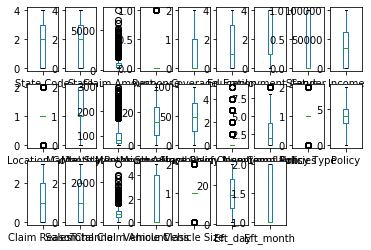

In [11]:
claim.plot(kind='box',layout=(3,9),subplots=True)

Boxplot is a graphical representation of statical values. It also shows you the outliers present in the dataset.

In [12]:
claim.skew()

State Code                       0.052135
State                            0.052135
Claim Amount                     2.897466
Response                         2.035477
Coverage                         1.039606
Education                        0.336931
EmploymentStatus                 0.846760
Gender                           0.048000
Income                           0.270189
Location Code                    0.013150
Marital Status                  -0.090861
Monthly Premium Auto             2.119447
Months Since Last Claim          0.260305
Months Since Policy Inception    0.044148
Number of Open Complaints        2.779449
Number of Policies               1.220575
Policy Type                     -0.422453
Policy                          -0.417532
Claim Reason                     0.723539
Sales Channel                    0.508647
Total Claim Amount               1.563444
Vehicle Class                    0.416190
Vehicle Size                     0.082200
Eft_day                          0

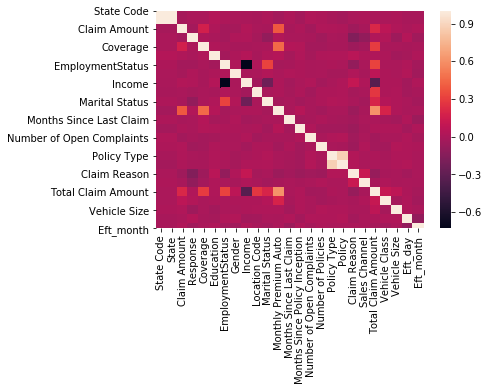

In [13]:
import seaborn as sns
sns.heatmap(claim.corr())


Correlation tells you how the variables are related to eachother. Columns with darker colour(ie. towards -0.6) are lightly correlated and with lighter colour(ie. towards 0.9)are highly correlated.

In [14]:
from scipy.stats import zscore
dt=abs(zscore(claim))
print(claim.shape)
claim_new=claim.loc[(dt<3).all(axis=1)]
print(claim_new.shape)

(4086, 25)
(3791, 25)


In [15]:
for i in claim_new.columns:
    if claim_new.skew().loc[i]>0.55:
        claim_new[i]=np.sqrt(claim_new[i])
        
print(claim_new.skew())

State Code                       0.048234
State                            0.048234
Claim Amount                     1.011116
Response                         2.040730
Coverage                         0.652850
Education                        0.339631
EmploymentStatus                 0.119135
Gender                           0.050154
Income                           0.275692
Location Code                    0.015685
Marital Status                  -0.084389
Monthly Premium Auto             0.986714
Months Since Last Claim          0.260959
Months Since Policy Inception    0.050231
Number of Open Complaints        1.817047
Number of Policies               0.808070
Policy Type                     -0.433759
Policy                          -0.421692
Claim Reason                     0.027485
Sales Channel                    0.501971
Total Claim Amount              -0.368072
Vehicle Class                    0.428612
Vehicle Size                     0.078029
Eft_day                         -0

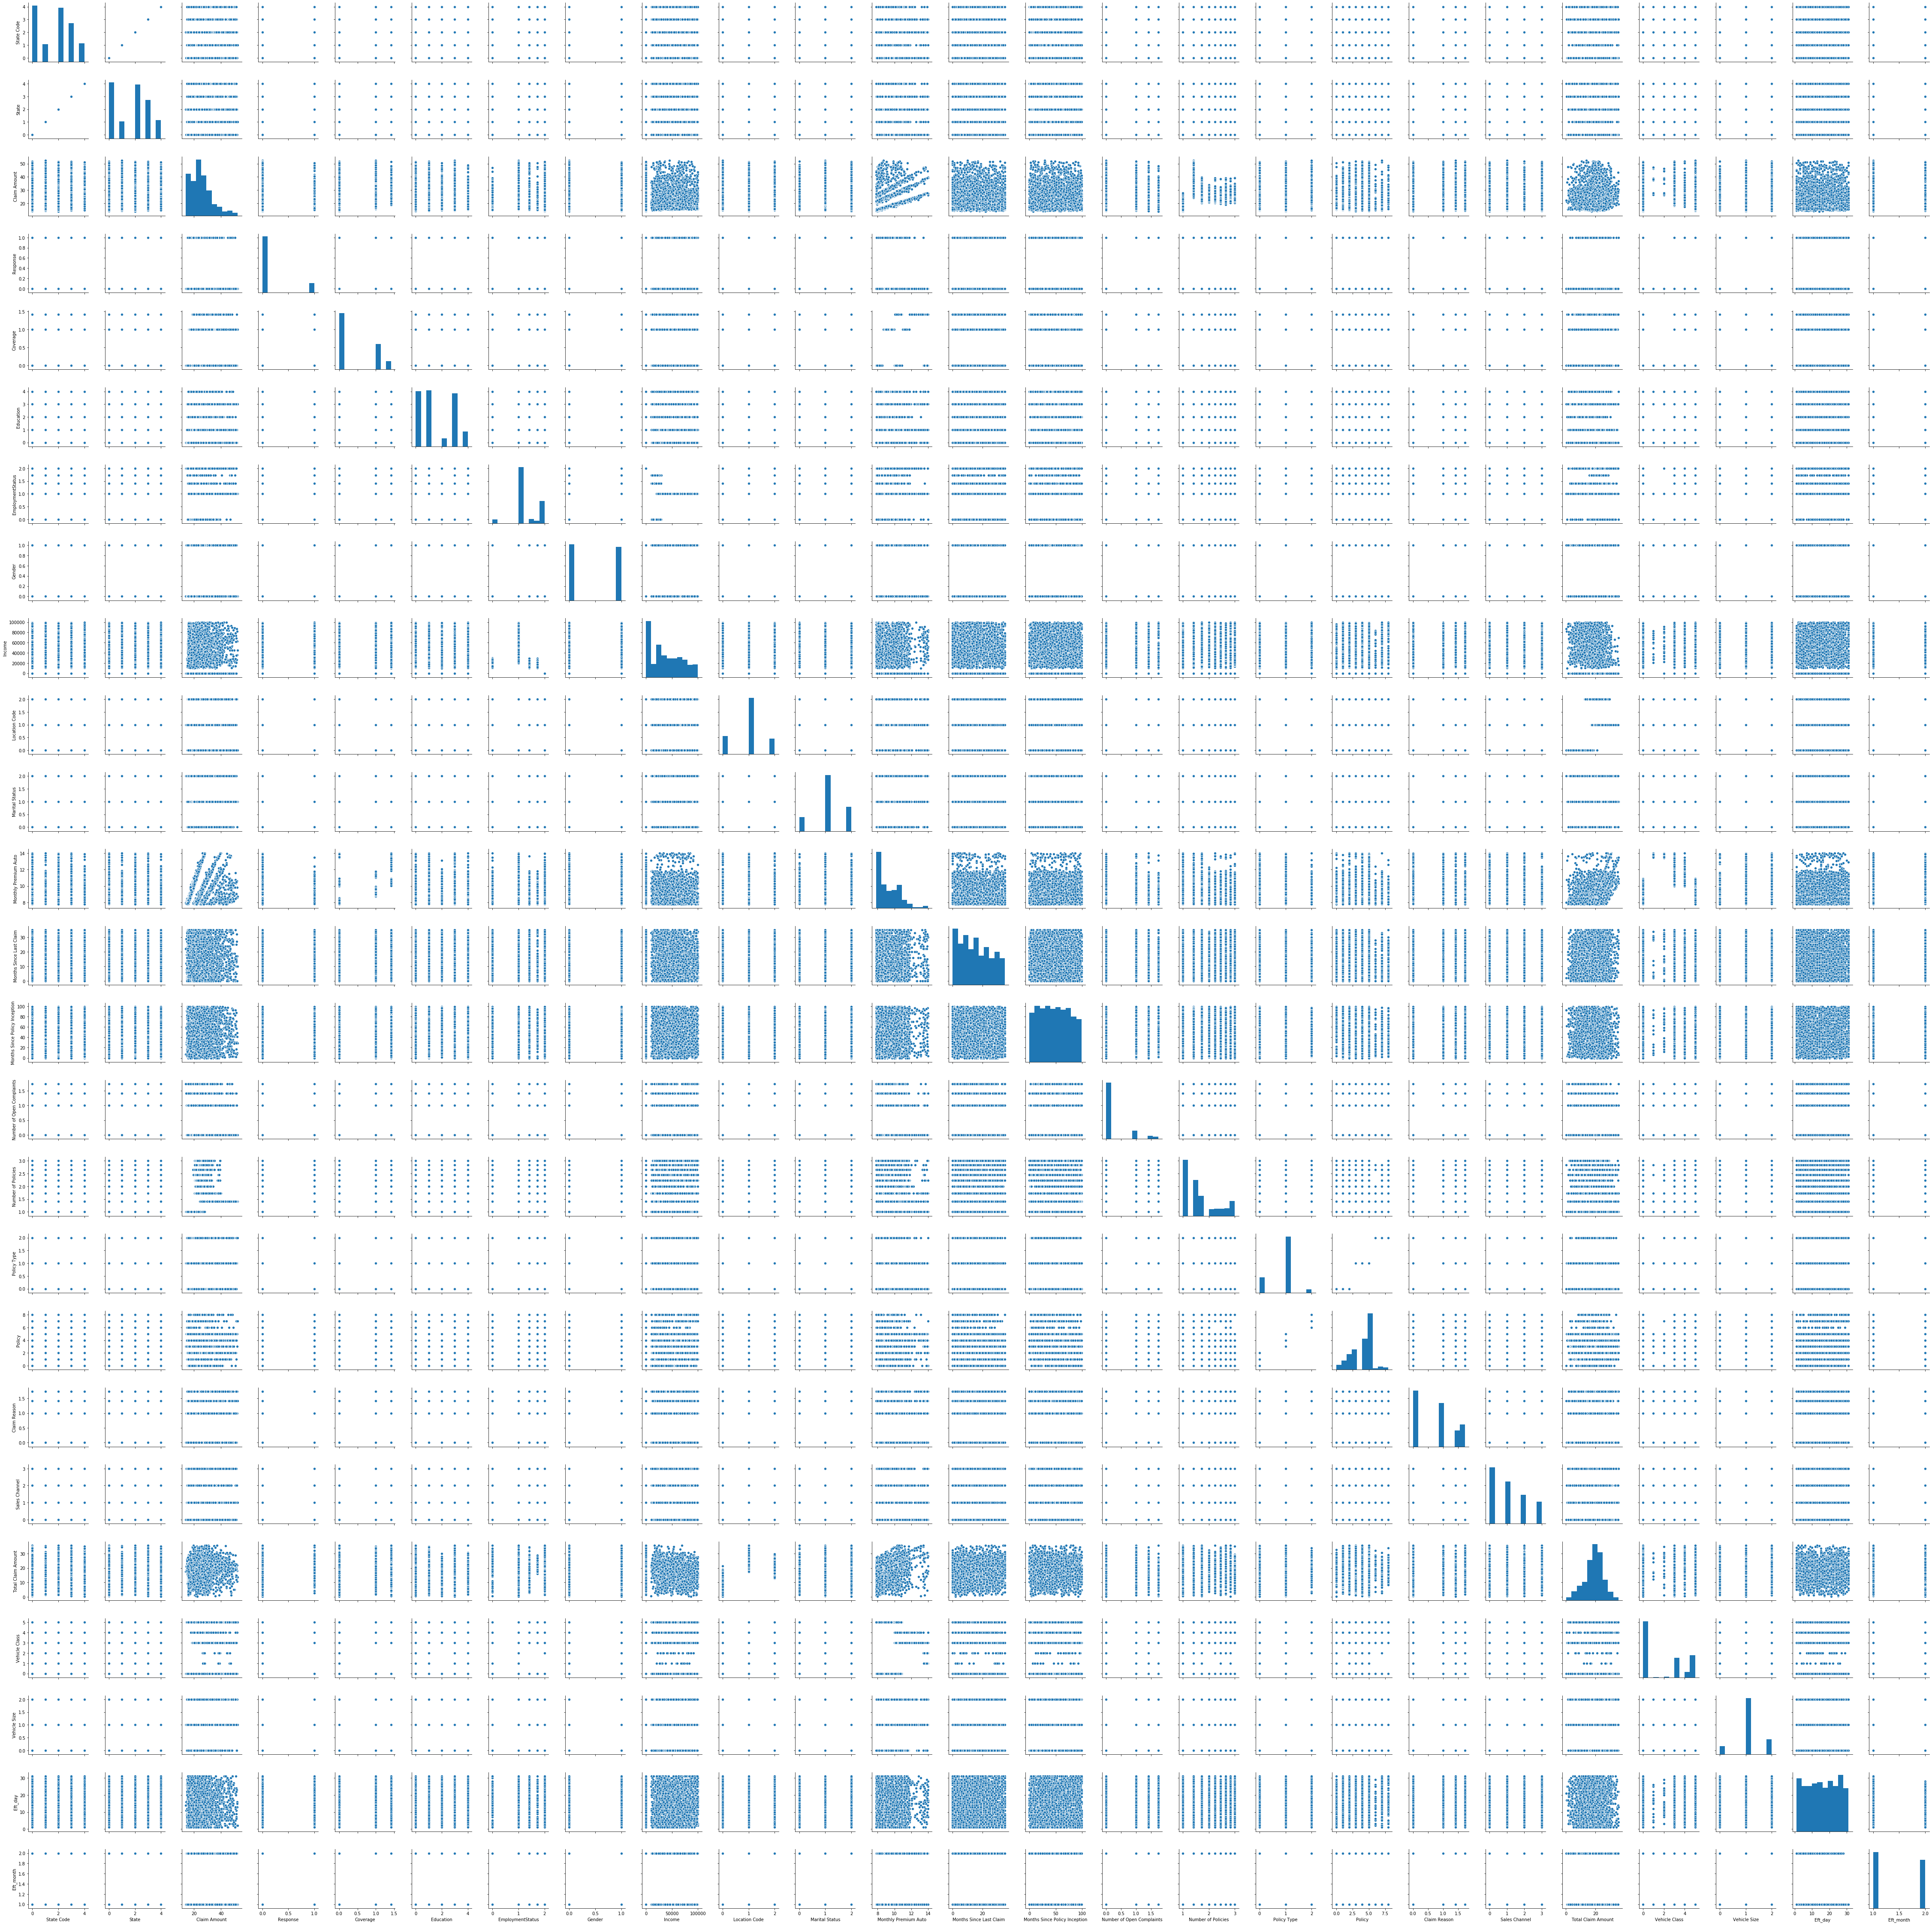

In [16]:
sns.pairplot(claim_new)

pair plot shows a clear view of all variables and their realtion ship with all other variables.

In [17]:
x=claim_new.drop(columns=['Total Claim Amount','Response'])
y=claim_new['Total Claim Amount']


In [18]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report

In [19]:
def max_r2(reg,x,y):
    maxsrc=0
    for r in range(45,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.20)
        reg.fit(x_train,y_train)
        y_pred=reg.predict(x_test)
        r2src=r2_score(y_test,y_pred)
        if maxsrc<r2src:
            maxsrc=r2src
            final=r
            print("for final state",final,'max r2 score is:',maxsrc)    
    print('score of model:',reg.score(x_train,y_train))
    print('Cross val score:',cross_val_score(reg,x,y,cv=10).mean())

In [20]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
max_r2(lr,x,y)

for final state 45 max r2 score is: 0.5132622421830009
for final state 47 max r2 score is: 0.5393836371139389
for final state 48 max r2 score is: 0.5647550207751397
for final state 81 max r2 score is: 0.5656390654513668
for final state 94 max r2 score is: 0.5726033175181857
score of model: 0.5361531843503586
Cross val score: 0.5252207211356171


In [21]:
from sklearn.tree import DecisionTreeRegressor
dct=DecisionTreeRegressor()
max_r2(dct,x,y)


for final state 45 max r2 score is: 0.6570838077003794
for final state 46 max r2 score is: 0.7108177854267107
for final state 48 max r2 score is: 0.7176815213131575
for final state 52 max r2 score is: 0.7357127518753249
for final state 95 max r2 score is: 0.7457528065873387
score of model: 0.9999999999988713
Cross val score: 0.6968171015189453


In [22]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
max_r2(kn,x,y)

for final state 46 max r2 score is: 0.03303813222015306
for final state 47 max r2 score is: 0.09745998878504547
for final state 86 max r2 score is: 0.10253559427974956
for final state 97 max r2 score is: 0.10695770762652101
score of model: 0.37810170721609226
Cross val score: 0.05808323903904069


In [23]:
from sklearn.svm import SVR
svr=SVR()
max_r2(svr,x,y)

for final state 45 max r2 score is: 0.03482547780100609
for final state 46 max r2 score is: 0.035479388020670966
for final state 48 max r2 score is: 0.03769015875164461
for final state 50 max r2 score is: 0.03973361672147391
for final state 52 max r2 score is: 0.04224528979120867
for final state 53 max r2 score is: 0.04285708929964416
for final state 95 max r2 score is: 0.046077688023279384
score of model: 0.24894906136344697
Cross val score: 0.03849338378241318


In [24]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
max_r2(rfr,x,y)

for final state 45 max r2 score is: 0.8035275255188432
for final state 46 max r2 score is: 0.8117558230986952
for final state 47 max r2 score is: 0.8289100981117823
for final state 48 max r2 score is: 0.835693393277241
for final state 55 max r2 score is: 0.8382603113604629
for final state 80 max r2 score is: 0.8456270933067839
score of model: 0.9682207952709967
Cross val score: 0.8239648302838773


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,50,100,1000]}
clf=GridSearchCV(gbr,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [26]:
gbr=GradientBoostingRegressor(learning_rate=0.01,n_estimators=1000)
max_r2(gbr,x,y)

for final state 45 max r2 score is: 0.8227001121318743
for final state 46 max r2 score is: 0.8347018812281579
for final state 47 max r2 score is: 0.8391673358584396
for final state 48 max r2 score is: 0.8531644447661317
score of model: 0.8666391422194951
Cross val score: 0.8354163923347689


In [27]:
from sklearn.ensemble import AdaBoostRegressor
adb=AdaBoostRegressor()
parameters={'learning_rate':[0.001,0.01,0.1,1],'n_estimators':[10,50,100,1000]}
clf=GridSearchCV(adb,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1000}

In [28]:
adb=AdaBoostRegressor(learning_rate=0.01,n_estimators=1000)
max_r2(adb,x,y)

for final state 45 max r2 score is: 0.7741155518705454
for final state 48 max r2 score is: 0.776408255911335
for final state 51 max r2 score is: 0.7794840654955132
for final state 65 max r2 score is: 0.7867485893160682
for final state 73 max r2 score is: 0.7889714014783035
for final state 98 max r2 score is: 0.7893167326381484
score of model: 0.7834660852059132
Cross val score: 0.7707855570815272


In [ ]:
from sklearn.externals import joblib
joblib.dump(gbr,'Insurance_claims')